In [1]:
#imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
%matplotlib notebook
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import seaborn as sns

In [112]:
DataFile = pd.read_csv('C:/Users/muneeba/Desktop/THESIS/DataDistributionPCA.csv') 
X1=DataFile.iloc[:,0] # sensor IDs
DataFile=DataFile[:65]
DataFile=DataFile.iloc[:,4:10]
Y1=DataFile['0.2']
Y2=DataFile['0.4']
Y3=DataFile['0.6']
Y4=DataFile['0.8']
DataFile.describe()

,0.2,0.4,0.6,0.8,1,1.2
count,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01
mean,8.477821e-02,8.197989e-02,7.698065e-02,7.017216e-02,6.172612e-02,5.221328e-02
std,1.073161e-01,1.037069e-01,9.746982e-02,8.932636e-02,8.016903e-02,7.149178e-02
min,4.290000e-08,4.170000e-08,3.990000e-08,3.750000e-08,3.470000e-08,3.140000e-08
25%,2.439750e-03,2.357000e-03,2.203250e-03,1.993750e-03,1.721250e-03,1.417000e-03
50%,1.965000e-02,1.895000e-02,1.760000e-02,1.570000e-02,1.390000e-02,1.230000e-02
75%,1.412500e-01,1.357500e-01,1.235000e-01,1.132500e-01,1.075000e-01,8.085000e-02
max,3.290000e-01,3.200000e-01,3.090000e-01,2.970000e-01,2.830000e-01,2.680000e-01


In [114]:
DataFile.head()

,0.2,0.4,0.6,0.8,1,1.2
0,0.189000,0.184000,0.17600,0.166000,0.153000,0.139000
1,0.157000,0.153000,0.14600,0.138000,0.127000,0.115000
2,0.051500,0.050100,0.04790,0.045100,0.041600,0.037700
3,0.006690,0.006510,0.00622,0.005850,0.005400,0.004880
4,0.000579,0.000559,0.00052,0.000465,0.000396,0.000317


In [178]:
data_frame = pd.DataFrame( DataFile)
data_frame['0.2']=data_frame['1'] # setting the target
 

In [116]:
X = data_frame.drop('0.2', axis=1)
print(X.shape)
print(type(X))
Y = data_frame['0.2']
 

(64, 5)
<class 'pandas.core.frame.DataFrame'>


In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=3/4., random_state=0) # split the data in train and test data


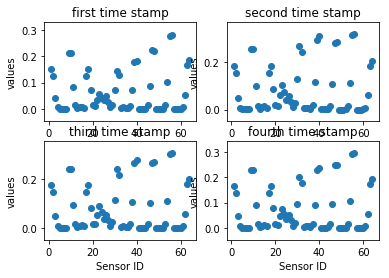

In [177]:
from pylab import *
subplot(2,2,1)
title('first time stamp')
xlabel('Sensor ID')
ylabel('values')
scatter(X1,Y1)
subplot(2,2,2)
title('second time stamp')
xlabel('Sensor ID')
ylabel('values')
scatter(X1,Y2)
subplot(2,2,3)
title('third time stamp')
xlabel('Sensor ID')
ylabel('values')
scatter(X1,Y3)
subplot(2,2,4)
title('fourth time stamp')
xlabel('Sensor ID')
ylabel('values')
scatter(X1,Y4) 
 
 
show()

In [43]:
lm = LinearRegression() # call method
lm.fit(X_train, Y_train) # use values
Y_train_pred = lm.predict(X_train)
Y_test_pred = lm.predict(X_test)

In [137]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_train_pred = lm.predict(X_train)
Y_test_pred = lm.predict(X_test)

train_mse = sklearn.metrics.mean_squared_error(Y_train, Y_train_pred)
test_mse = sklearn.metrics.mean_squared_error(Y_test, Y_test_pred)
print("Train MSE {}".format(train_mse))
print("Test MSE {}".format(test_mse))  

Train MSE 9.685311248443454e-33
Test MSE 8.857409328800994e-33


our test data has much lower error then train data this means we donot have the issue of over fittting 
once we train our model with the data . it works well with other values

In [138]:
lm = Ridge(alpha=0.5)
lm.fit(X_train, Y_train)

Y_train_pred = lm.predict(X_train)
Y_test_pred = lm.predict(X_test)

train_mse = sklearn.metrics.mean_squared_error(Y_train, Y_train_pred)
test_mse = sklearn.metrics.mean_squared_error(Y_test, Y_test_pred)
print("Train MSE {}".format(train_mse))
print("Test MSE {}".format(test_mse))

Train MSE 0.0012575527291109302
Test MSE 0.0013909096302125255


Regularization is comming up with the fact that we donot have all of the data
so instead of just summing up the error we also add the sum of model's wieght

In [142]:
import csv
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
 

Common Regularization techniques include
1. Ridge --- magnitute squred
2. Laso -- just wieght
3. Elastic regression  --- summing up of above two


[ 0.1         0.64444444  1.18888889  1.73333333  2.27777778  2.82222222
  3.36666667  3.91111111  4.45555556  5.        ]


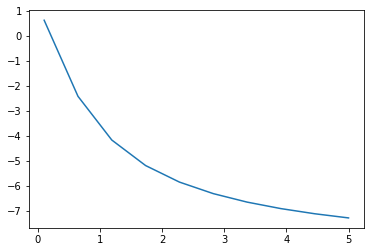

In [176]:
%matplotlib inline
lm_ridge = Ridge()
alphas = np.linspace(0.1, 5, 10)
print(alphas)
n_folds = 3
from pylab import *
clf = GridSearchCV(lm_ridge, [{'alpha': alphas}], cv=n_folds)
clf.fit(X_train, Y_train)
scores = clf.cv_results_['mean_test_score']
plt.plot(alphas, scores)
plt.show()

if our data is in the form that does not give any significant value then one-hot encoding can be done. for this explore get-dummy data in sklearn 